## Linear Regression Analysis of Californian Housing Price Determinants using Python

![alt text](california_housing.tmb-1920x690.jpg "Title")
<div style="text-align: justify">
The California housing market presents a complex landscape for both buyers and sellers. Accurately identifying the features that statistically influence house prices is crucial for informed decision-making.

This project uses machine learning, specifically linear regression, to perform a causal analysis. The goal is to identify the key features that have a statistically significant impact on Californian house prices.

By understanding these causal relationships, it can equip the following market participants with actionable insights:

**Buyers**: Gain valuable insights to prioritize features that matter most for their search, optimizing their purchase decisions.

**Sellers**: Identify features that can be strategically highlighted in listings to attract buyers and potentially achieve faster sales at a more competitive price.

This project contributes to a more transparent and data-driven understanding of the California housing market, benefiting both buyers and sellers.

Image © Wärtsilä
</div>

### About the Dataset
<div style="text-align: justify">

**Context**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required. The columns are as follows, and their names are self explanatory:

- Independent Variable
    - longitude
    - latitude
    - housing_median_age
    - total_rooms
    - total_bedrooms
    - population
    - households
    - median_income
    - ocean_proximity

- Dependent Variable
    - median_house_value

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\Renz\AppData\Local\Temp\ipykernel_23000\2444590888.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
housing_data = pd.read_csv("C:/Users/Renz/Documents/GitHub/Linear Regression Analysis of Californian Housing Price Determinants using Python/housing.csv")
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Missing Data Analysis

In [6]:
# Checking missing values
missing_values = housing_data.isnull().sum()

# Calculating the percentage of missing data per column
missing_values_percentage = (missing_values / len(housing_data)) * 100

print('Missing values in each column:\n', missing_values)
print('\nPercentage of missing values:\n', missing_values_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing values:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [9]:
# Removing rows with missing values
housing_data_cleaned = housing_data.dropna()

print(housing_data_cleaned.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Exploratory Data Analysis

In [14]:
housing_data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


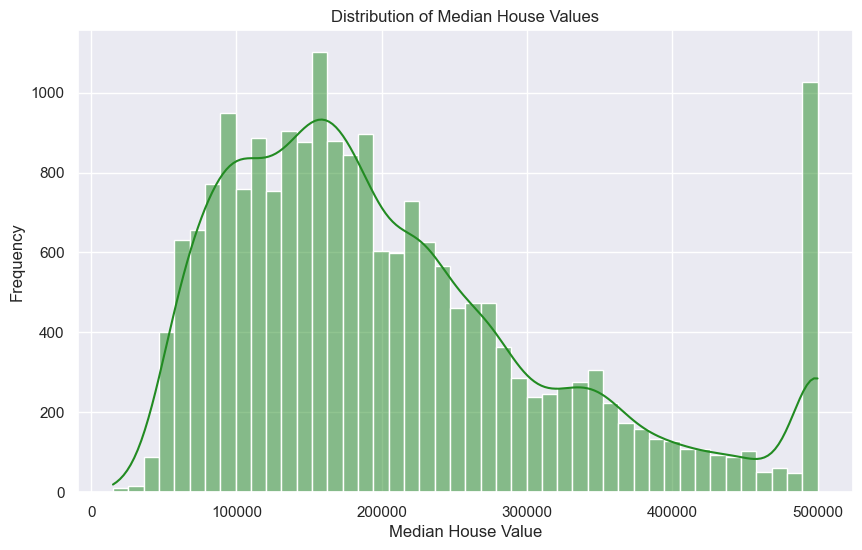

In [16]:
# Visualizing the target variable

sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(housing_data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### Removing Outliers Using Interquartile Range

In [30]:
Q1 = housing_data_cleaned['median_house_value'].quantile(0.25)
Q3 = housing_data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
housing_data_no_outliers_1 = housing_data_cleaned[(housing_data_cleaned['median_house_value'] >= lower_bound) & (housing_data_cleaned['median_house_value'] <= upper_bound)]

# Checking the shape of data before and after outlier removal
print('Original data shape: ', housing_data_cleaned.shape)
print('Data shape without outliers: ', housing_data_no_outliers_1.shape)

Original data shape:  (20433, 10)
Data shape without outliers:  (19369, 10)


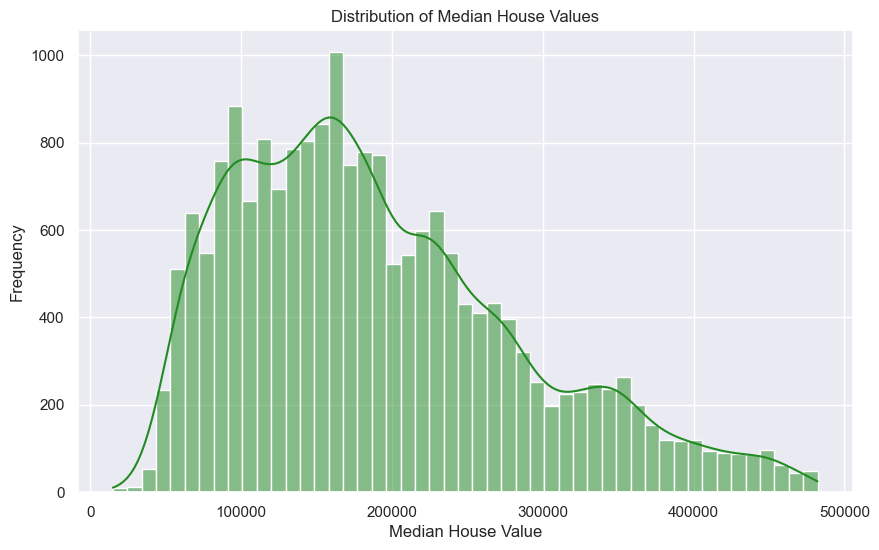

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(housing_data_no_outliers_1['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### Detecting Outliers Using Box and Whisker Plot

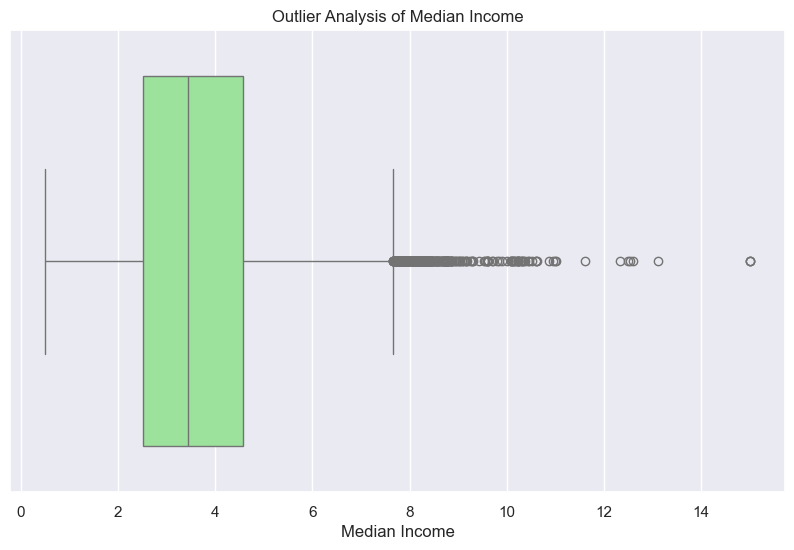

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data_no_outliers_1['median_income'], color='lightgreen')
plt.title('Outlier Analysis of Median Income')
plt.xlabel('Median Income')
plt.show()

In [38]:
Q1_income = housing_data_no_outliers_1['median_income'].quantile(0.25)
Q3_income = housing_data_no_outliers_1['median_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Defining the bounds for outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Removing outliers
above_lower_bound = housing_data_no_outliers_1['median_income'] >= lower_bound_income
above_upper_bound = housing_data_no_outliers_1['median_income'] <= upper_bound_income
housing_data_no_outliers_2 = housing_data_no_outliers_1[(above_lower_bound) & (above_upper_bound)]

# Checking the shape of data before and after outlier removal
print('Original data shape: ', housing_data_no_outliers_1.shape)
print('Data shape without outliers: ', housing_data_no_outliers_2.shape)

Original data shape:  (19369, 10)
Data shape without outliers:  (19026, 10)


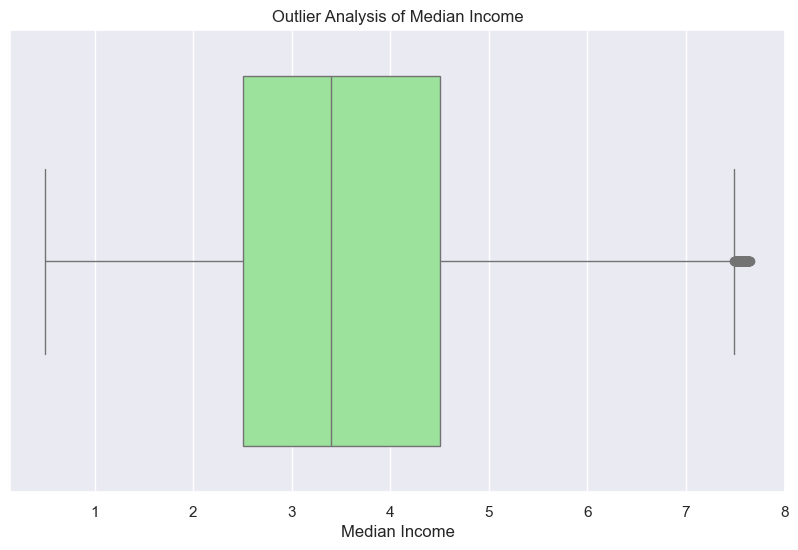

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data_no_outliers_2['median_income'], color='lightgreen')
plt.title('Outlier Analysis of Median Income')
plt.xlabel('Median Income')
plt.show()

### Correleration Heatmap